In [1]:
include("../src/llob.jl")

calc_vwap_price (generic function with 1 method)

In [22]:
set_default_plot_size(5inch, 4inch)

In [12]:
function plot_schedule_cost_cmp(schedule)
    # Plot schedule with theoretical solution.
    p2 = plot(
        schedule,
        x=:t, y=:z,
        Geom.line,
    );
    # Plot cumulative position, note that t=0 should have 0 position.
    cum_pos = circshift(cumsum(schedule.η .* schedule.dt), 1)
    cum_pos[1] = 0
    p4 = plot(
        schedule,
        x=:t, y=cum_pos,
        Geom.line,
        Guide.ylabel("position"),
    );
    # Avoid singularities at beginning and end.
    theo_schedule = DataFrame(
        t = (schedule.t[1:end - 1] .+ schedule.t[2:end]) ./ 2
    )
    theo_schedule[!, :η] = (theo_schedule.t .* (1 .- theo_schedule.t)).^(-1/4)
    theo_schedule[!, :η] .*= cum_pos[end] / (schedule.dt[1] .* sum(theo_schedule.η))
    p1 = plot(
        layer(schedule, x=:t, y=:η, Geom.step),
        layer(theo_schedule, x=:t, y=:η, Geom.line, Theme(default_color="Red")),
    );
    # For cost, compare with vwap execution.
    vwap = calc_vwap_price(cum_pos[end], schedule.t[end], schedule.dt[1])
    calc_cost!(vwap)
    p3 = plot(
        schedule,
        x=:t, y=:c,
        Geom.line,
        yintercept=[vwap.c[end]],
        Geom.hline(color="Red"),
    );
    p3
end

plot_schedule_cost_cmp (generic function with 1 method)

In [2]:
set_default_plot_size(6inch, 8inch)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping(::DataFrame, ::Symbol) at dataframes.jl:96
└ @ Gadfly /home/shimmy/.julia/packages/Gadfly/1wgcD/src/dataframes.jl:96


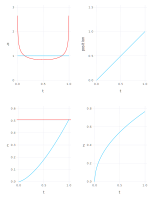

In [3]:
vwap = calc_vwap_price(1, 1, 0.005)
calc_cost!(vwap);
plot_schedule_theo(vwap)

In [4]:
m = 100 * [0.2000809,0,0,0,0,0,0,0,0,0,0,0,0,0.1405311,0,0,0,0,0,0.09281809,0,0,0,0.07087044,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1007506,0,0.03660915,0,0,0,0,0.001708684,0.001017543,0.001397463,0.0007735012,0,0,0,0,0,0,0,0,0.09943178,0,0,0.005327777,0.003243534,0.004482769,0.004455653,0.003818174,0.004933891,0.003867007,0.004617562,0.004089368,0.004276473,0.004226324,0.004247665,0.004164468,0.004115296,0.004065114,0.003991986,0.00390602,0.003748839,0.003560223,0.003225596,0.002882665,0.001412195,0,0,0,0.06022491,0,0.004963018,0.0054073,0.005577338,0.005648668,0.005600122,0.00535657,0.003870081,0,0.03431605,0.003817365,0.004113785,0.02845695];

In [6]:
t = collect(0:(1 / size(m, 1)):1);

In [7]:
proxy = gen_from_sparse_schedule(m, t, 0.0001);

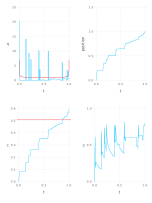

In [8]:
calc_price!(proxy);
calc_cost!(proxy);
plot_schedule_theo(proxy)

In [25]:
plot_schedule_cost_cmp(proxy) |> SVG("proxy_cost.svg")

false